# Check mass balance - Hock

Niccolò Tubini, 16 July 2021

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gf.io import gf_io

In [7]:
in_rain_5min= gf_io.read_OMS_timeseries('snowrainsep_precip_10_5min_1_impulso.csv',-9999)
in_rain_5min.index = pd.to_datetime(in_rain_5min.index)

in_snow_5min= gf_io.read_OMS_timeseries('snowrainsep_snow_10_5min_1_impulso.csv',-9999)
in_snow_5min.index = pd.to_datetime(in_snow_5min.index)

in_rain = gf_io.read_OMS_timeseries('snowrainsep_precip_10_1_impulso.csv',-9999)
in_rain.index = pd.to_datetime(in_rain.index)

in_snow = gf_io.read_OMS_timeseries('snowrainsep_snow_10_1_impulso.csv',-9999)
in_snow.index = pd.to_datetime(in_snow.index)

In [8]:
swe_5min = gf_io.read_OMS_timeseries('SWEHock_1_impulso_5min.csv',-9999)
swe_5min.index = pd.to_datetime(swe_5min.index)

melting_5min = gf_io.read_OMS_timeseries('MeltingHock_1_impulso_5min.csv',-9999)
melting_5min.index = pd.to_datetime(melting_5min.index)

swe = gf_io.read_OMS_timeseries('SWEHock_1_impulso_hourly.csv',-9999)
swe.index = pd.to_datetime(swe.index)

melting = gf_io.read_OMS_timeseries('MeltingHock_1_impulso_hourly.csv',-9999)
melting.index = pd.to_datetime(melting.index)

## Mass Balance hourly

In [9]:
in_rain['10'].sum()+in_snow['10'].sum() - melting['10'].sum()

0.0

## Mass Balance 5 minutes

In [10]:
in_rain_5min['10'].sum()+in_snow_5min['10'].sum() - melting_5min['10'].sum()

0.0

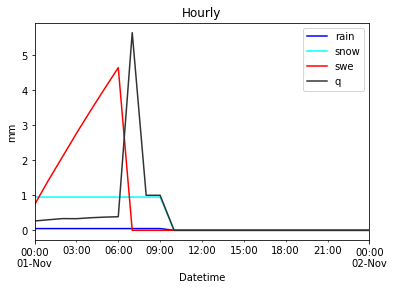

In [11]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-02 00:00'
in_rain[tStart:tEnd]['10'].plot(color='blue')
in_snow[tStart:tEnd]['10'].plot(color='cyan')
swe[tStart:tEnd]['10'].plot(color='red')
melting[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('Hourly')
plt.show()

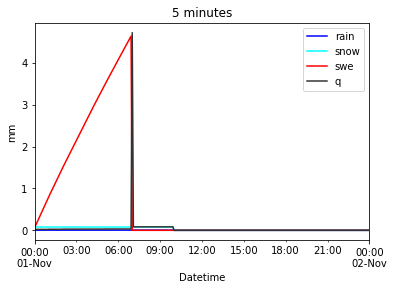

In [12]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-02 00:00'
in_rain_5min[tStart:tEnd]['10'].plot(color='blue')
in_snow_5min[tStart:tEnd]['10'].plot(color='cyan')
swe_5min[tStart:tEnd]['10'].plot(color='red')
melting_5min[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('5 minutes')
plt.show()

## Resample 5 min to hourly

In [13]:
melting_resampled = melting_5min.resample('1h').sum()
swe_resampled = swe_5min.resample('1h').mean()

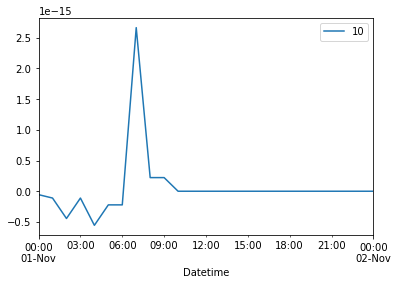

In [14]:
(melting_resampled- melting).plot()

In [15]:
print('hourly\t\t\t5min')
print(swe.loc['2013-11-01 00:00']['10'], swe_5min.loc['2013-11-01 00:55']['10'])
print(swe.loc['2013-11-01 01:00']['10'], swe_5min.loc['2013-11-01 01:55']['10'])
print(swe.loc['2013-11-01 02:00']['10'], swe_5min.loc['2013-11-01 02:55']['10'])
print(swe.loc['2013-11-01 03:00']['10'], swe_5min.loc['2013-11-01 03:55']['10'])
print(swe.loc['2013-11-01 04:00']['10'], swe_5min.loc['2013-11-01 04:55']['10'])

hourly			5min
0.7339823611590399 0.7339823611590404
1.4324247728294233 1.4324247728294246
2.0978750186941233 2.0978750186941255
2.7659527525551435 2.7659527525551457
3.4077556064529593 3.407755606452962
